In [1]:
# import libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
# getting the dataset
xls=pd.ExcelFile(r'C:\Users\DELL\Documents\Customer_retention_dataset-\customer_retention_dataset.xlsx')
df= pd.read_excel(xls,'codedsheet')    # loading coded sheet
df_d=pd.read_excel(xls,'datasheet')          # loading datasheet

In [9]:
# checking the data
df.head()

1Gender of respondent  2 How old are you?   \
0                      0                    3   
1                      1                    2   
2                      1                    2   
3                      0                    2   
4                      1                    2   

  3 Which city do you shop online from?  \
0                                 Delhi   
1                                 Delhi   
2                         Greater Noida   
3                               Karnal    
4                            Bangalore    

   4 What is the Pin Code of where you shop online from?  \
0                                             110009       
1                                             110030       
2                                             201308       
3                                             132001       
4                                             530068       

   5 Since How Long You are Shopping Online ?  \
0                                           5   
1                                           5   
2                                           4   
3                                           4   
4                                           3   

   6 How many times you have made an online purchase in the past 1 year?  \
0                                                  4                       
1                                                  5                       
2                                                  5                       
3                                                  1                       
4                                                  2                       

   7 How do you access the internet while shopping on-line?  \
0                                                  4          
1                                                  2          
2                                                  3          
3                                                  3          
4                                                  2          

   8 Which device do you use to access the online shopping?  \
0                                                  3          
1                                                  1          
2                                                  1          
3                                                  1          
4                                                  1          

   9 What is the screen size of your mobile device?\t\t\t\t\t\t                                          \
0                                                  5                                                      
1                                                  2                                                      
2                                                  4                                                      
3                                                  4                                                      
4                                                  2                                                      

   10 What is the operating system (OS) of your device?\t\t\t\t                                            \
0                                                  1                                                        
1                                                  3                                                        
2                                                  2                                                        
3                                                  3                                                        
4                                                  3                                                        

   ...  Longer time to get logged in (promotion, sales period)  \
0  ...                                          Amazon.in        
1  ...                            Amazon.in, Flipkart.com        
2  ...                                         Myntra.com        
3  ...          

In [4]:
# checking the dimension
df.shape

(269, 71)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                                                                                                                                                                                                          Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                          --------------  ----- 
 0   1Gender of respondent                                                                                                                                                                                           269 non-null    int64 
 1   2 How old are you?                                                                                                                                                                    

As this is coded data, most of the columns are in coded form, i.e. numerical columns from column 47 onwards we can see that its Multiple choice answer so, they are in the categorical form

In [6]:
df.isnull().sum()

1Gender of respondent                                                   0
2 How old are you?                                                      0
3 Which city do you shop online from?                                   0
4 What is the Pin Code of where you shop online from?                   0
5 Since How Long You are Shopping Online ?                              0
                                                                       ..
Longer delivery period                                                  0
Change in website/Application design                                    0
Frequent disruption when moving from one page to another                0
Website is as efficient as before                                       0
Which of the Indian online retailer would you recommend to a friend?    0
Length: 71, dtype: int64

No null values, the data looks good, it is safe to move ahead.

In [7]:
# listing all the columns.
df.columns

Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how 

We can see that our data consist of two major types of columns: 1) Continuous column    2) Categorical columns.

Again when we dive deep into the data, we can observe that there are some informational column like Gender, age range, city, pincode, Time since shopping online, Device use, how you access internet, Scrteen size, Operating system, Browser run, Which channel used.

Then some columns are specific about website or portal use to make online shopping by the customer: How they access after first visit, time spend on website before making purchase decision, preferred payment method, 

Then about customer not making purchase:  how frequently they abandon there shopping cart, why they abandon.


Then there are rating columns from 18-47: which deal with rating regarding, website, its content, information provided, about monetary savings included discounts and offers,gradification, user friendly interface, trust, user satisfaction and so on.

And lastly our dataset has columns which are like multiple choice answer, where they tell about various website/ application used by them for online shopping, based on certain criteria or in other word ease of use, hassle free transition and overall performance including trustworthiness.


From here it is clear that certain columns are merely information like pincode, we alreday got city to cover it, so we can drop it in other to build the ML model. Let's move from here, then we will decide how to move ahead in the process.

In [57]:
# dropping pincode column
df= df.drop('4 What is the Pin Code of where you shop online from?', axis=1)
df.shape

(269, 70)

In [58]:
# statistical description of our dataset
df.describe()

1Gender of respondent  2 How old are you?   \
count             269.000000           269.000000   
mean                0.669145             2.959108   
std                 0.471398             1.066012   
min                 0.000000             1.000000   
25%                 0.000000             2.000000   
50%                 1.000000             3.000000   
75%                 1.000000             4.000000   
max                 1.000000             5.000000   

       5 Since How Long You are Shopping Online ?  \
count                                  269.000000   
mean                                     3.524164   
std                                      1.436586   
min                                      1.000000   
25%                                      3.000000   
50%                                      4.000000   
75%                                      5.000000   
max                                      5.000000   

       6 How many times you have made an online purchase in the past 1 year?  \
count                                         269.000000                       
mean                                            2.672862                       
std                                             1.651788                       
min                                             1.000000                       
25%                                             1.000000                       
50%                                             2.000000                       
75%                                             4.000000                       
max                                             5.000000                       

       7 How do you access the internet while shopping on-line?  \
count                                         269.000000          
mean                                            3.260223          
std                                             1.135887          
min                                             2.000000          
25%                                             2.000000          
50%                                             3.000000          
75%                                             5.000000          
max                                             5.000000          

       8 Which device do you use to access the online shopping?  \
count                                         269.000000          
mean                                            1.676580          
std                                             0.843904          
min                                             1.000000          
25%                                             1.000000          
50%                                             1.000000          
75%                                             2.000000          
max                                             4.000000          

       9 What is the screen size of your mobile device?\t\t\t\t\t\t                                          \
count                                         269.000000                                                      
mean                                            4.282528                                                      
std                                             0.923426                                                      
min                                             2.000000                                                      
25%                                             4.000000                                                      
50%                                             4.000000                                                      
75%                                             5.000000                                                      
max                                             5.000000                                                      

       10 What is the operating system (OS) of your device?\t\t\t\t                                            \
count    

We can observe that the mean value for from column 18-42, 47 are around 4 which means most of the customers agrees with the statement given, while from column 43-46 we can responses mean as 3-3.5 meaning customers do have indifferent opinion about online shopping as in getting sense of adventure, enchance social status, fulfill certain roles, basically some of the hedoniv values. While they feel strongly in favor about there utilititarian values. 

In [11]:
#Since categorical column has object datatype we will print all of the object data types and their unique values.

for column in df.columns:
    if df[column].dtype == object:    #checking datatype for each column if it is 'object'
        print(str(column) + ' : ' + str(df[column].unique()))   #unique() gives all the unique value of that column 
        print(df[column].value_counts())  # value_counts() count the number belongs to different class in that column
        print("\n _________________________________________________________________\n")

3 Which city do you shop online from? : ['Delhi' 'Greater Noida' 'Karnal ' 'Bangalore ' 'Noida' 'Solan'
 'Moradabad' 'Gurgaon ' 'Merrut' 'Ghaziabad' 'Bulandshahr']
Delhi            58
Greater Noida    43
Noida            40
Bangalore        37
Karnal           27
Solan            18
Ghaziabad        18
Gurgaon          12
Merrut            9
Moradabad         5
Bulandshahr       2
Name: 3 Which city do you shop online from?, dtype: int64

 _________________________________________________________________

From the following, tick any (or all) of the online retailers you have shopped from;                                                                            : ['Amazon.in, Paytm.com'
 'Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com'
 'Amazon.in, Paytm.com, Myntra.com'
 'Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com'
 'Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com'
 'Amazon.in, Flipkart.com' 'Amazon.in, Flipkart.com, Snapdeal.com'
 'Amazon.in' 'Amazon.in, Flipka

# EDA

In [139]:
# Feature engineering, Let's divide our data into caontinuous or numerical column and categorical column
# Listing Continuous columns
conti_col=[]
for column in df.columns:
    if df[column].dtype == 'int64':    #checking datatype for each column if it is 'object'
        conti_col.append(str(column))

# Listing Categorical columns
cat_column=[]
for column in df.columns:
    if df[column].dtype == object:    #checking datatype for each column if it is 'object'
        cat_column.append(str(column))

cat_column.pop(0)

'3 Which city do you shop online from?'

Let's do univariate analysis of each column depends on there datatype.

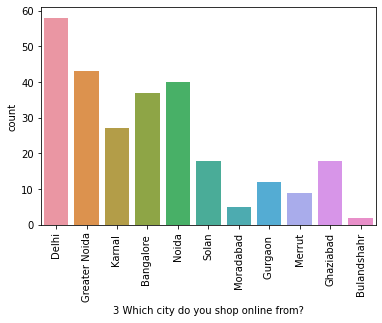

In [144]:
sns.countplot(df['3 Which city do you shop online from?'])
plt.xticks(rotation=90)
plt.show()

We can see that Most of the online shoppers are from from Delhi, while the lowest mark goes to Bulandshahr.

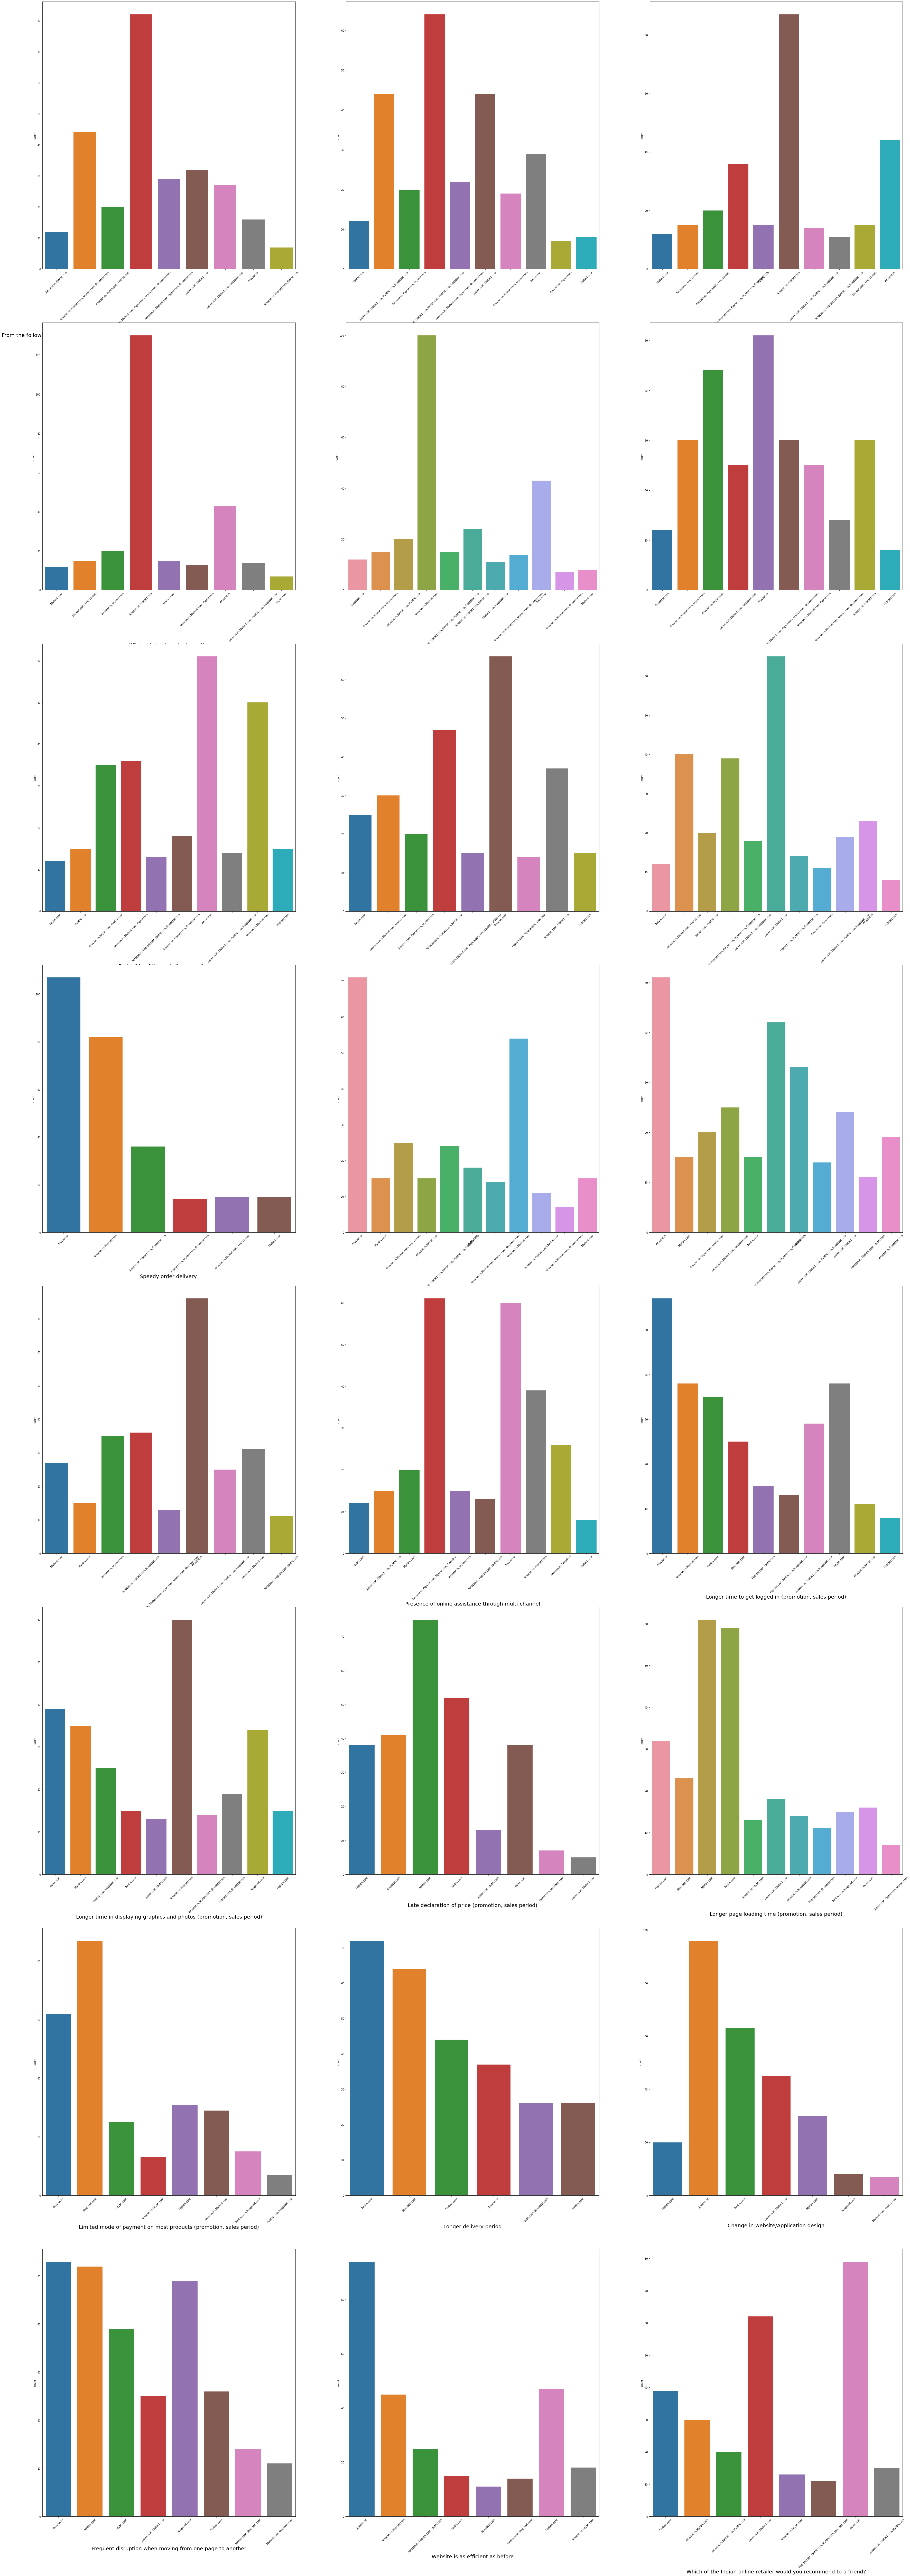

<Figure size 432x288 with 0 Axes>

In [141]:
# Visualizing the categorical columns 
plt.figure(figsize=(60,180))
plotnumber=1
for column in df[cat_column]:
    if plotnumber<=24:
        ax=plt.subplot(8,3,plotnumber)
        sns.countplot(df[column])
        plt.xticks(rotation=45)
        plt.xlabel(column,fontsize=20)
        plotnumber+=1
plt.show()#checking datatype for each column if it is 'object'
plt.savefig("cat_data")      

Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com are the site from were most of the shopping done from.
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com are easy to access websites or application.
Amazon.in, Flipkart.com has highest visual appeal in there web layout.
Amazon.in, Flipkart.com   has widest variety of products to offer.
Amazon.in, Flipkart.com  are the sites which provide complete and relevant product description
Amazon.in proves to be fastest loading website and application. followed by paytm.com
More number of customer also founf Amazon.in as most reliable website or application followed by flipkart
Even for quickness to complete purcahse Amazon.com stand first.
While talking about availability of payment options, Amazon and flipkart are on top.
While talking about speedy order delivery, No body can compete with Amazon followed by flipkart.
When talking about privacy also, many believes that amazon stay on top.
If we talk about securirty of financial information of the customer, again Amazon is on top followed byAmazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com
For the obvious reason we can clearly see that Amazon.in percieved highest trustworthiness.
Amazon.in, Flipkart.com, Myntra.com, Snapdeal has good presence of online assitance through multiple channels.
Longer time to get logged in (promotion, sales period) :Amazon.in
Longer time in displaying graphics and photos (promotion, sales period): Amazon.in , Flipkart.com
Late declaration of price (promotion, sales period) : Myntra.com
Longer page loading time (promotion, sales period) : Myntra.com followed by paytm.com
Limited mode of payment on most products (promotion, sales period) : Snapdeal.com
Longer delivery period : paytm.com followed by Snapdeal.com
Change in website/Application design : Amazon.in followed by paytm.com
Frequent disruption when moving from one page to another : Amazon.in followed by Myntra.com
Website is as efficient as before : Amazon.in
Which of the Indian online retailer would you recommend to a friend? : Well Amazon.in got highest recommendation followed by Flipkart.


From this we can analyse that amazon and flipkart are the most trustworthy, competent, efficient and secure website which customer believes. Then  later on followed by Myntra.com , paytm.com , snapdeal.com.

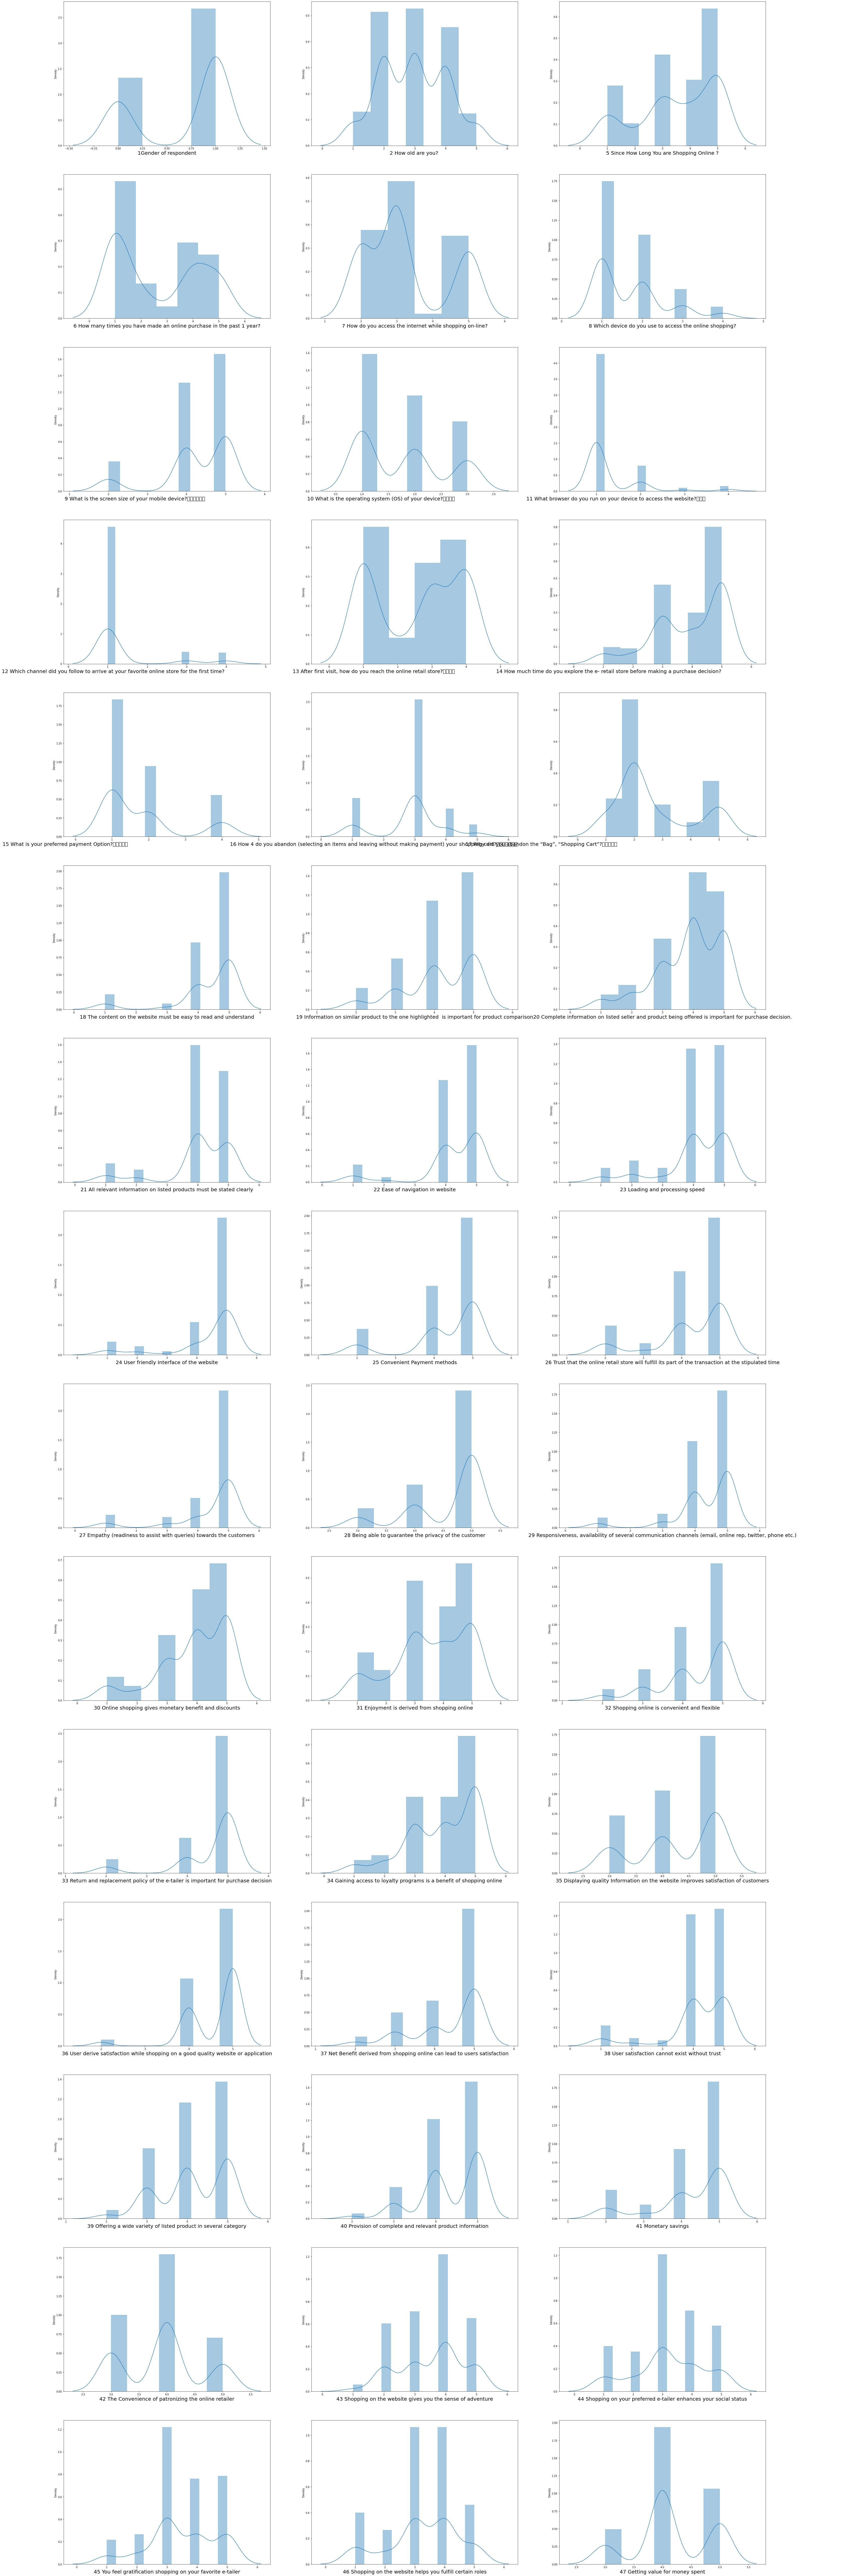

In [129]:
# visualizing continuous column data
plt.figure(figsize=(50,200))
plotnumber=1
for column in df[conti_col]:
    if plotnumber<=47:
            ax=plt.subplot(16,3,plotnumber)
            sns.distplot(df[column])
            plt.xlabel(column,fontsize=20)
            plotnumber+=1
plt.show()
    

The distribution of the data clearly shows that almost all the columns have discrete values, Which is quite clear as this is coded version of categorical data.
As we know that Five major factors that contributed to the success of an e-commerce store have been identified as: service quality, system quality, information quality, trust and net benefit and from above categorical visual analysis amazon stand correct in almost every field. When we observe above continuous data visualization we can see that prefered payment option is mostly credit/debit card.
People Sometimes also abandon there cart as they get better alternative option/offer.

Customer strongly agree that the content of the website must be easy to read and understand
We can see that customer strongly agrees on security, shopping convenience , monetary benefits and discount.i.e utilitarian values are highly important for customers. As they strongly agrees on the utilitarian features.
Customers also seeks great satisfaction on good quality website, net benefit derived from shopping, wide variety, complete relevant information about product.

Customer also shows indifferent opinion about gratification, it enhance your social status.
And agrees through online shopping they get the value for money spent. It gives them sense of adventure. i.e. Hedonic values also plays important role.



From here we also observe that same information is collected by twisting the question but as it is more of behavioral approach, it gives more clear outlook about the customer how he deals in particular situation.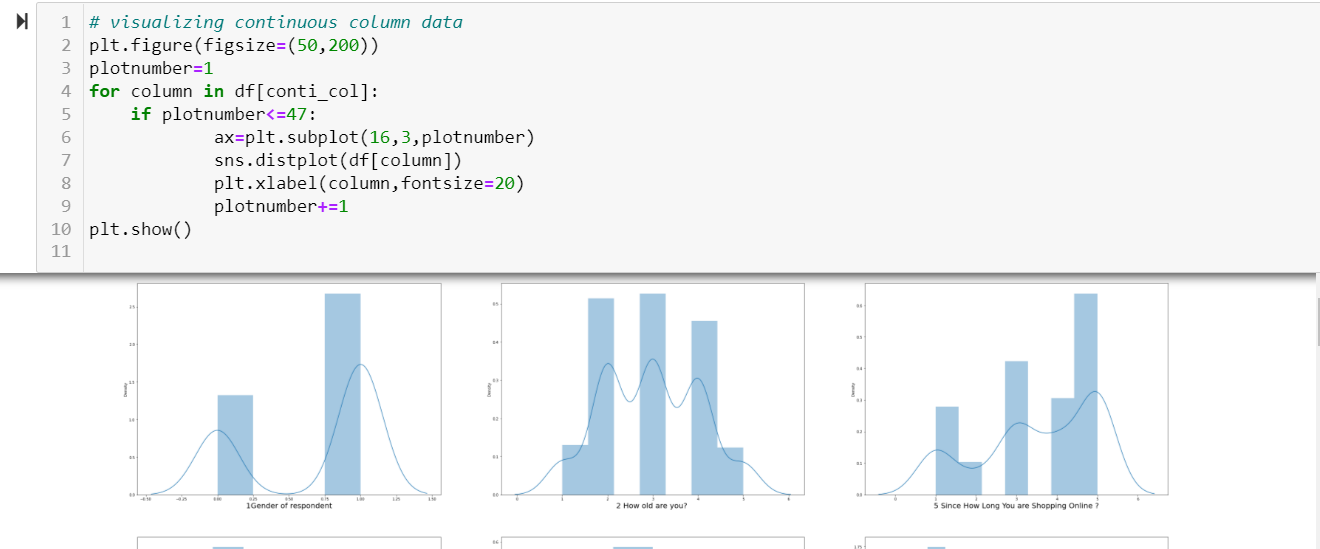

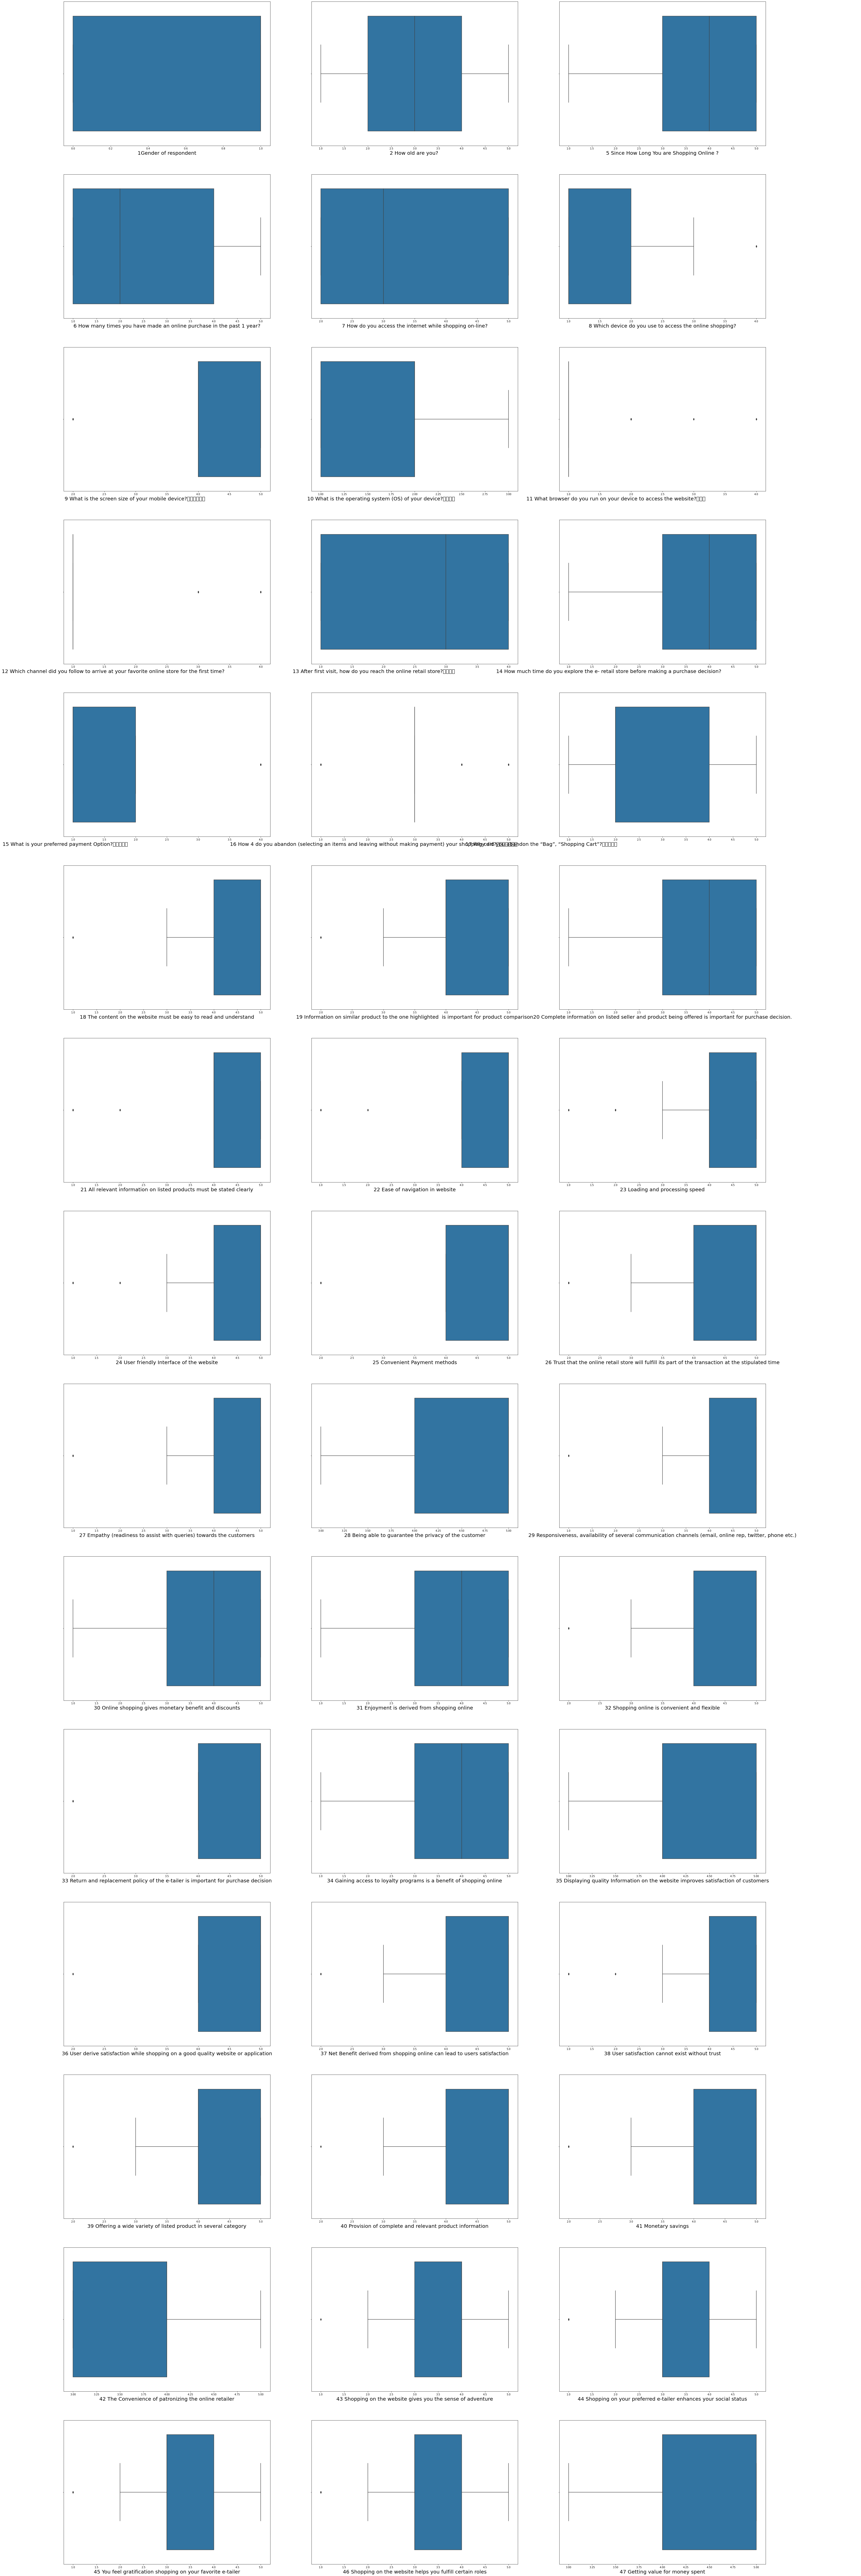

In [62]:
# Visualizing any outlier in continuous data
plt.figure(figsize=(50,200))
plotnumber=1
for column in df[conti_col]:
    if plotnumber<=47:
            ax=plt.subplot(16,3,plotnumber)
            sns.boxplot(df[column])
            plt.xlabel(column,fontsize=20)
            plotnumber+=1
plt.show()


There are some points which can be outlier, we will further use Z score method to find out if we have any outlier later in the process. From above we can also see that there are some customers which are providing with lower scores and shows there dissatisfaction, this type of data is also important as we can see what ,akes them dissatified and what are there experiences. 

In other words, we acn find out the negatives about the online shopping service.

We can also say that Number of purchase is the column which gives us clear picture about the overall online shopping experience.

Also one thing to be noted that, the multi choice categorical columns uses the above features to rate the websites or application on there performance.

So we can keep them aside in our further data analysis, we will use city from our categorical columns only.

<Figure size 2160x1800 with 0 Axes>

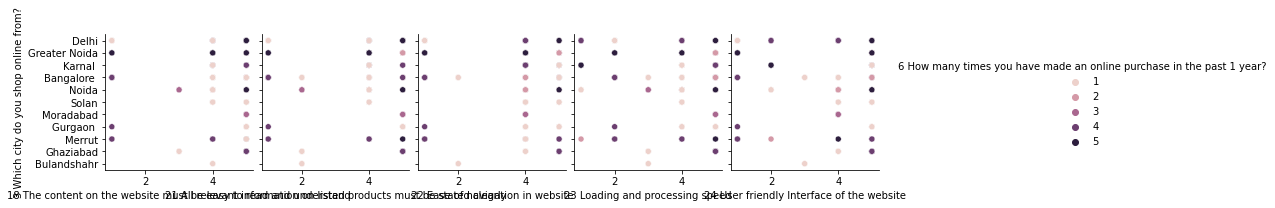

In [165]:
# let's explore data on the basis of service quality.
plt.figure(figsize=(30,25))
ax=sns.pairplot(x_vars=['18 The content on the website must be easy to read and understand',
       '21 All relevant information on listed products must be stated clearly',
       '22 Ease of navigation in website', '23 Loading and processing speed',
       '24 User friendly Interface of the website'],
             y_vars='3 Which city do you shop online from?', 
             hue='6 How many times you have made an online purchase in the past 1 year?', data=df)

plt.show()

We can observe that customers from which ever city agrees or strongly agrees that the content or information must be clear. And the website good loading and processing speed and convinient to operate ultimately helps to make more purchases.

<Figure size 1440x1296 with 0 Axes>

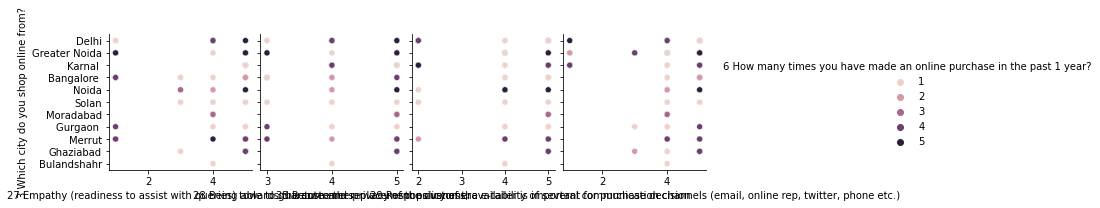

In [168]:
plt.figure(figsize=(20,18))
sns.pairplot(x_vars=['27 Empathy (readiness to assist with queries) towards the customers',
       '28 Being able to guarantee the privacy of the customer',
        '33 Return and replacement policy of the e-tailer is important for purchase decision',
       '29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)'],
            y_vars='3 Which city do you shop online from?',
            hue= '6 How many times you have made an online purchase in the past 1 year?',data=df)


plt.show()

We can observe that how a website or application serves to the customer i.e. their customer service places a vital role in case of customer retention, high percentage of customers agrees to strongly agrees that empathy, responsiveness gaurantee of customer privacy is very important, and those who take care of these things definitely get repeat purchase and customer loyalty. similarly returns and replacements is equally important, as this show they get value for their purchase.

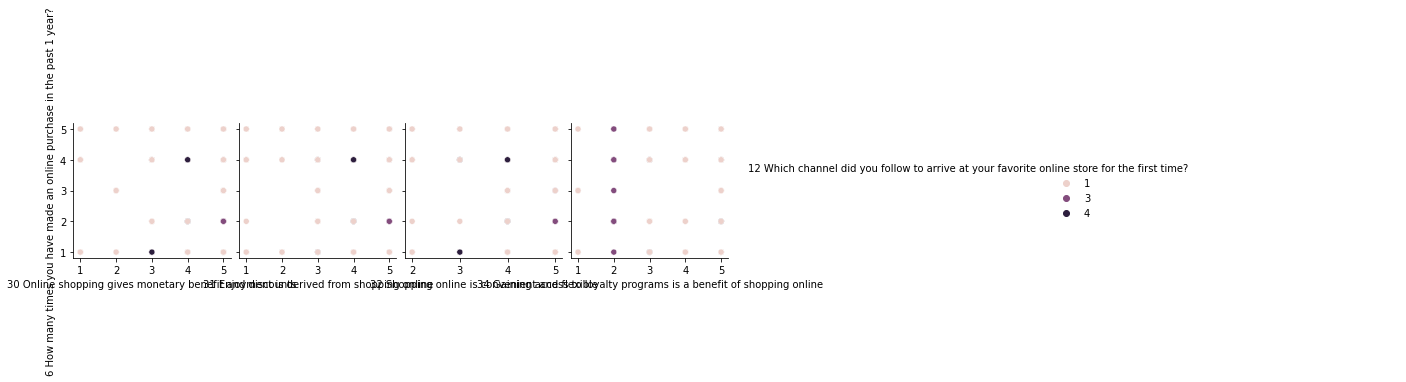

In [171]:
sns.pairplot(x_vars=['30 Online shopping gives monetary benefit and discounts',
       '31 Enjoyment is derived from shopping online',
       '32 Shopping online is convenient and flexible',
        '34 Gaining access to loyalty programs is a benefit of shopping online'], 
             y_vars='6 How many times you have made an online purchase in the past 1 year?', data=df, 
             hue='12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ')
       

We can clearly observe that more and more customer uses search engine to arrive their favorite online store, those who don't agree with loyalty program benefits, as they arrive to the online store through content marketing.

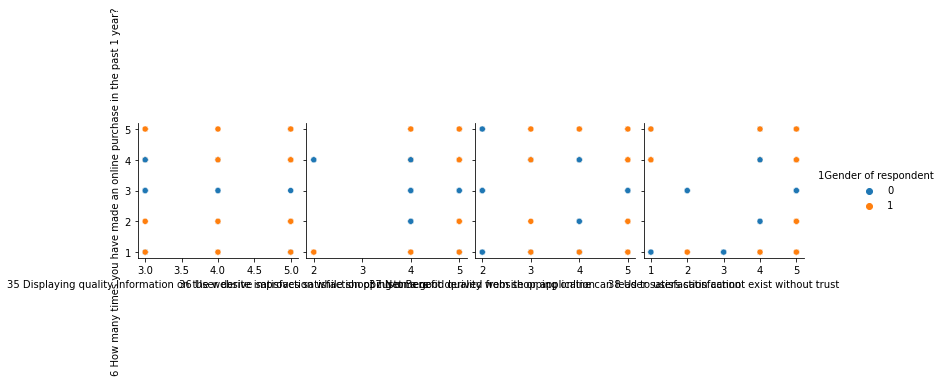

In [167]:
sns.pairplot(x_vars=['35 Displaying quality Information on the website improves satisfaction of customers',
       '36 User derive satisfaction while shopping on a good quality website or application',
       '37 Net Benefit derived from shopping online can lead to users satisfaction',
       '38 User satisfaction cannot exist without trust'],
           y_vars= '6 How many times you have made an online purchase in the past 1 year?', hue='1Gender of respondent',
           data=df)

Its interesting to observe that mostly male shop for 21-30 times over past one year, but female comes into both category they shop even more or less , there customer satisfaction level varies from indifferent to strongly agree. We also observe that some male do not agree with the statement '37 Net Benefit derived from shopping online can lead to users satisfaction'.

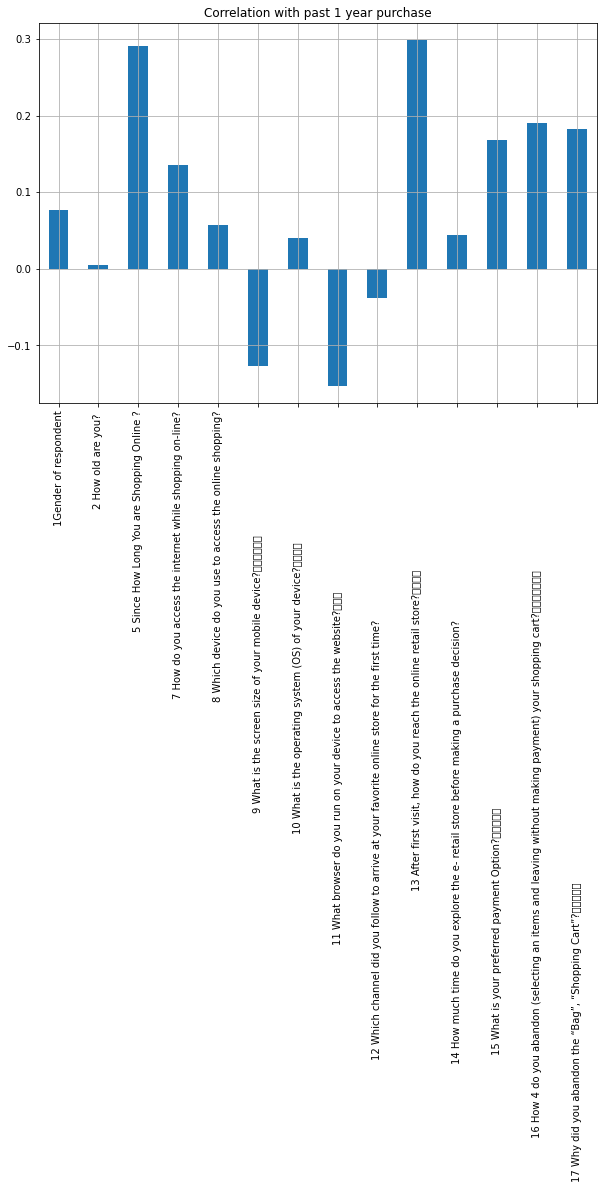

In [173]:
data_conti=df[['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how do you reach the online retail store?\t\t\t\t                                                   ',
       '14 How much time do you explore the e- retail store before making a purchase decision?                                                                   ',
       '15 What is your preferred payment Option?\t\t\t\t\t                                                                                                                               ',
       '16 How 4 do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t                                                   ',
       '17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t                                                                                                                                                       ',]]

data_conti.corrwith(df['6 How many times you have made an online purchase in the past 1 year?']).plot(kind='bar', grid= True, figsize=(10,7),
                                                  title="Correlation with past 1 year purchase")

plt.show()
    
    
    
    
    

From here we can observe that 'After first visit, how do you reach the online retail store?' is highly correlated to repeat purchase, and second feature which also shows very strong correlation is 'Since How long you are shopping online?' while the least correlated feature is 'How old are you?'.

Some of the features are positively correlated i.e. they are directly proportional relation with each other, while some feature are negatively correlated i.e. inversely proportional with each other, one increases the other decreases. Both positively and negatively correlated features are equally important.

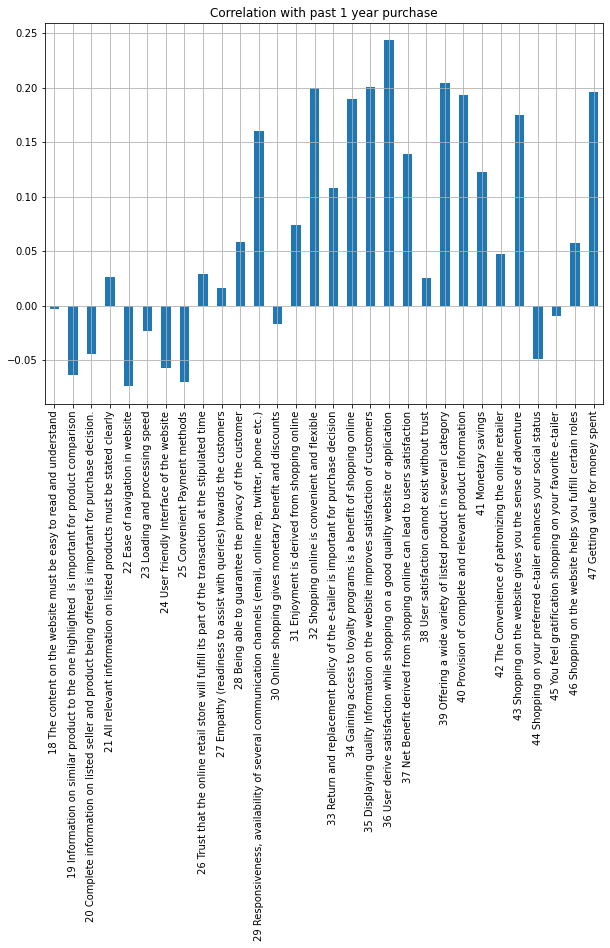

In [174]:
data_rating= df[['18 The content on the website must be easy to read and understand',
       '19 Information on similar product to the one highlighted  is important for product comparison',
       '20 Complete information on listed seller and product being offered is important for purchase decision.',
       '21 All relevant information on listed products must be stated clearly',
       '22 Ease of navigation in website', '23 Loading and processing speed',
       '24 User friendly Interface of the website',
       '25 Convenient Payment methods',
       '26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time',
       '27 Empathy (readiness to assist with queries) towards the customers',
       '28 Being able to guarantee the privacy of the customer',
       '29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)',
       '30 Online shopping gives monetary benefit and discounts',
       '31 Enjoyment is derived from shopping online',
       '32 Shopping online is convenient and flexible',
       '33 Return and replacement policy of the e-tailer is important for purchase decision',
       '34 Gaining access to loyalty programs is a benefit of shopping online',
       '35 Displaying quality Information on the website improves satisfaction of customers',
       '36 User derive satisfaction while shopping on a good quality website or application',
       '37 Net Benefit derived from shopping online can lead to users satisfaction',
       '38 User satisfaction cannot exist without trust',
       '39 Offering a wide variety of listed product in several category',
       '40 Provision of complete and relevant product information',
       '41 Monetary savings',
       '42 The Convenience of patronizing the online retailer',
       '43 Shopping on the website gives you the sense of adventure',
       '44 Shopping on your preferred e-tailer enhances your social status',
       '45 You feel gratification shopping on your favorite e-tailer',
       '46 Shopping on the website helps you fulfill certain roles',
       '47 Getting value for money spent']]

data_rating.corrwith(df['6 How many times you have made an online purchase in the past 1 year?']).plot(kind='bar', grid= True, figsize=(10,7),
                                                  title="Correlation with past 1 year purchase")

plt.show()
    

From here we can observe that customer satisfaction is highly correlated with past 1 year purchase. while '18 The content on the website must be easy to read and understand' is least correlated.

In [70]:
# before moving ahead lets chcek for correlation matrix, 
df.corr()

1Gender of respondent  \
1Gender of respondent                                            1.000000   
2 How old are you?                                              -0.034449   
5 Since How Long You are Shopping Online ?                      -0.046005   
6 How many times you have made an online purcha...               0.076121   
7 How do you access the internet while shopping...              -0.200974   
8 Which device do you use to access the online ...              -0.241847   
9 What is the screen size of your mobile device...              -0.058760   
10 What is the operating system (OS) of your de...              -0.038207   
11 What browser do you run on your device to ac...              -0.116712   
12 Which channel did you follow to arrive at yo...              -0.166694   
13 After first visit, how do you reach the onli...               0.104118   
14 How much time do you explore the e- retail s...               0.139327   
15 What is your preferred payment Option?\t\t\t...               0.049685   
16 How 4 do you abandon (selecting an items and...               0.090390   
17 Why did you abandon the “Bag”, “Shopping Car...              -0.024279   
18 The content on the website must be easy to r...               0.166977   
19 Information on similar product to the one hi...               0.260724   
20 Complete information on listed seller and pr...               0.079679   
21 All relevant information on listed products ...               0.143320   
22 Ease of navigation in website                                 0.167883   
23 Loading and processing speed                                  0.225080   
24 User friendly Interface of the website                        0.231970   
25 Convenient Payment methods                                    0.230923   
26 Trust that the online retail store will fulf...               0.177032   
27 Empathy (readiness to assist with queries) t...               0.105170   
28 Being able to guarantee the privacy of the c...               0.055174   
29 Responsiveness, availability of several comm...               0.029508   
30 Online shopping gives monetary benefit and d...               0.164411   
31 Enjoyment is derived from shopping online                     0.189852   
32 Shopping online is convenient and flexible                    0.234597   
33 Return and replacement policy of the e-taile...               0.183537   
34 Gaining access to loyalty programs is a bene...               0.113073   
35 Displaying quality Information on the websit...               0.285572   
36 User derive satisfaction while shopping on a...               0.178033   
37 Net Benefit derived from shopping online can...               0.347038   
38 User satisfaction cannot exist without trust                  0.097540   
39 Offering a wide variety of listed product in...               0.152595   
40 Provision of complete and relevant product i...               0.357061   
41 Monetary savings                                              0.201673   
42 The Convenience of patronizing the online re...               0.198382   
43 Shopping on the website gives you the sense ...              -0.005218   
44 Shopping on your preferred e-tailer enhances...              -0.046397   
45 You feel gratification shopping on your favo...               0.018482   
46 Shopping on the website helps you fulfill ce...              -0.113160   
47 Getting value for money spent                                 0.202014   

                                                    2 How old are you?   \
1Gender of respondent                                         -0.034449   
2 How old are you?                                             1.000000   
5 Since How Long You are Shopping Online ?                     0.014049   
6 How many times you have made an online purcha...             0.005089   
7 How do you access the internet while shopping...             0.024228   
8 Which device do you use to access the online ...         

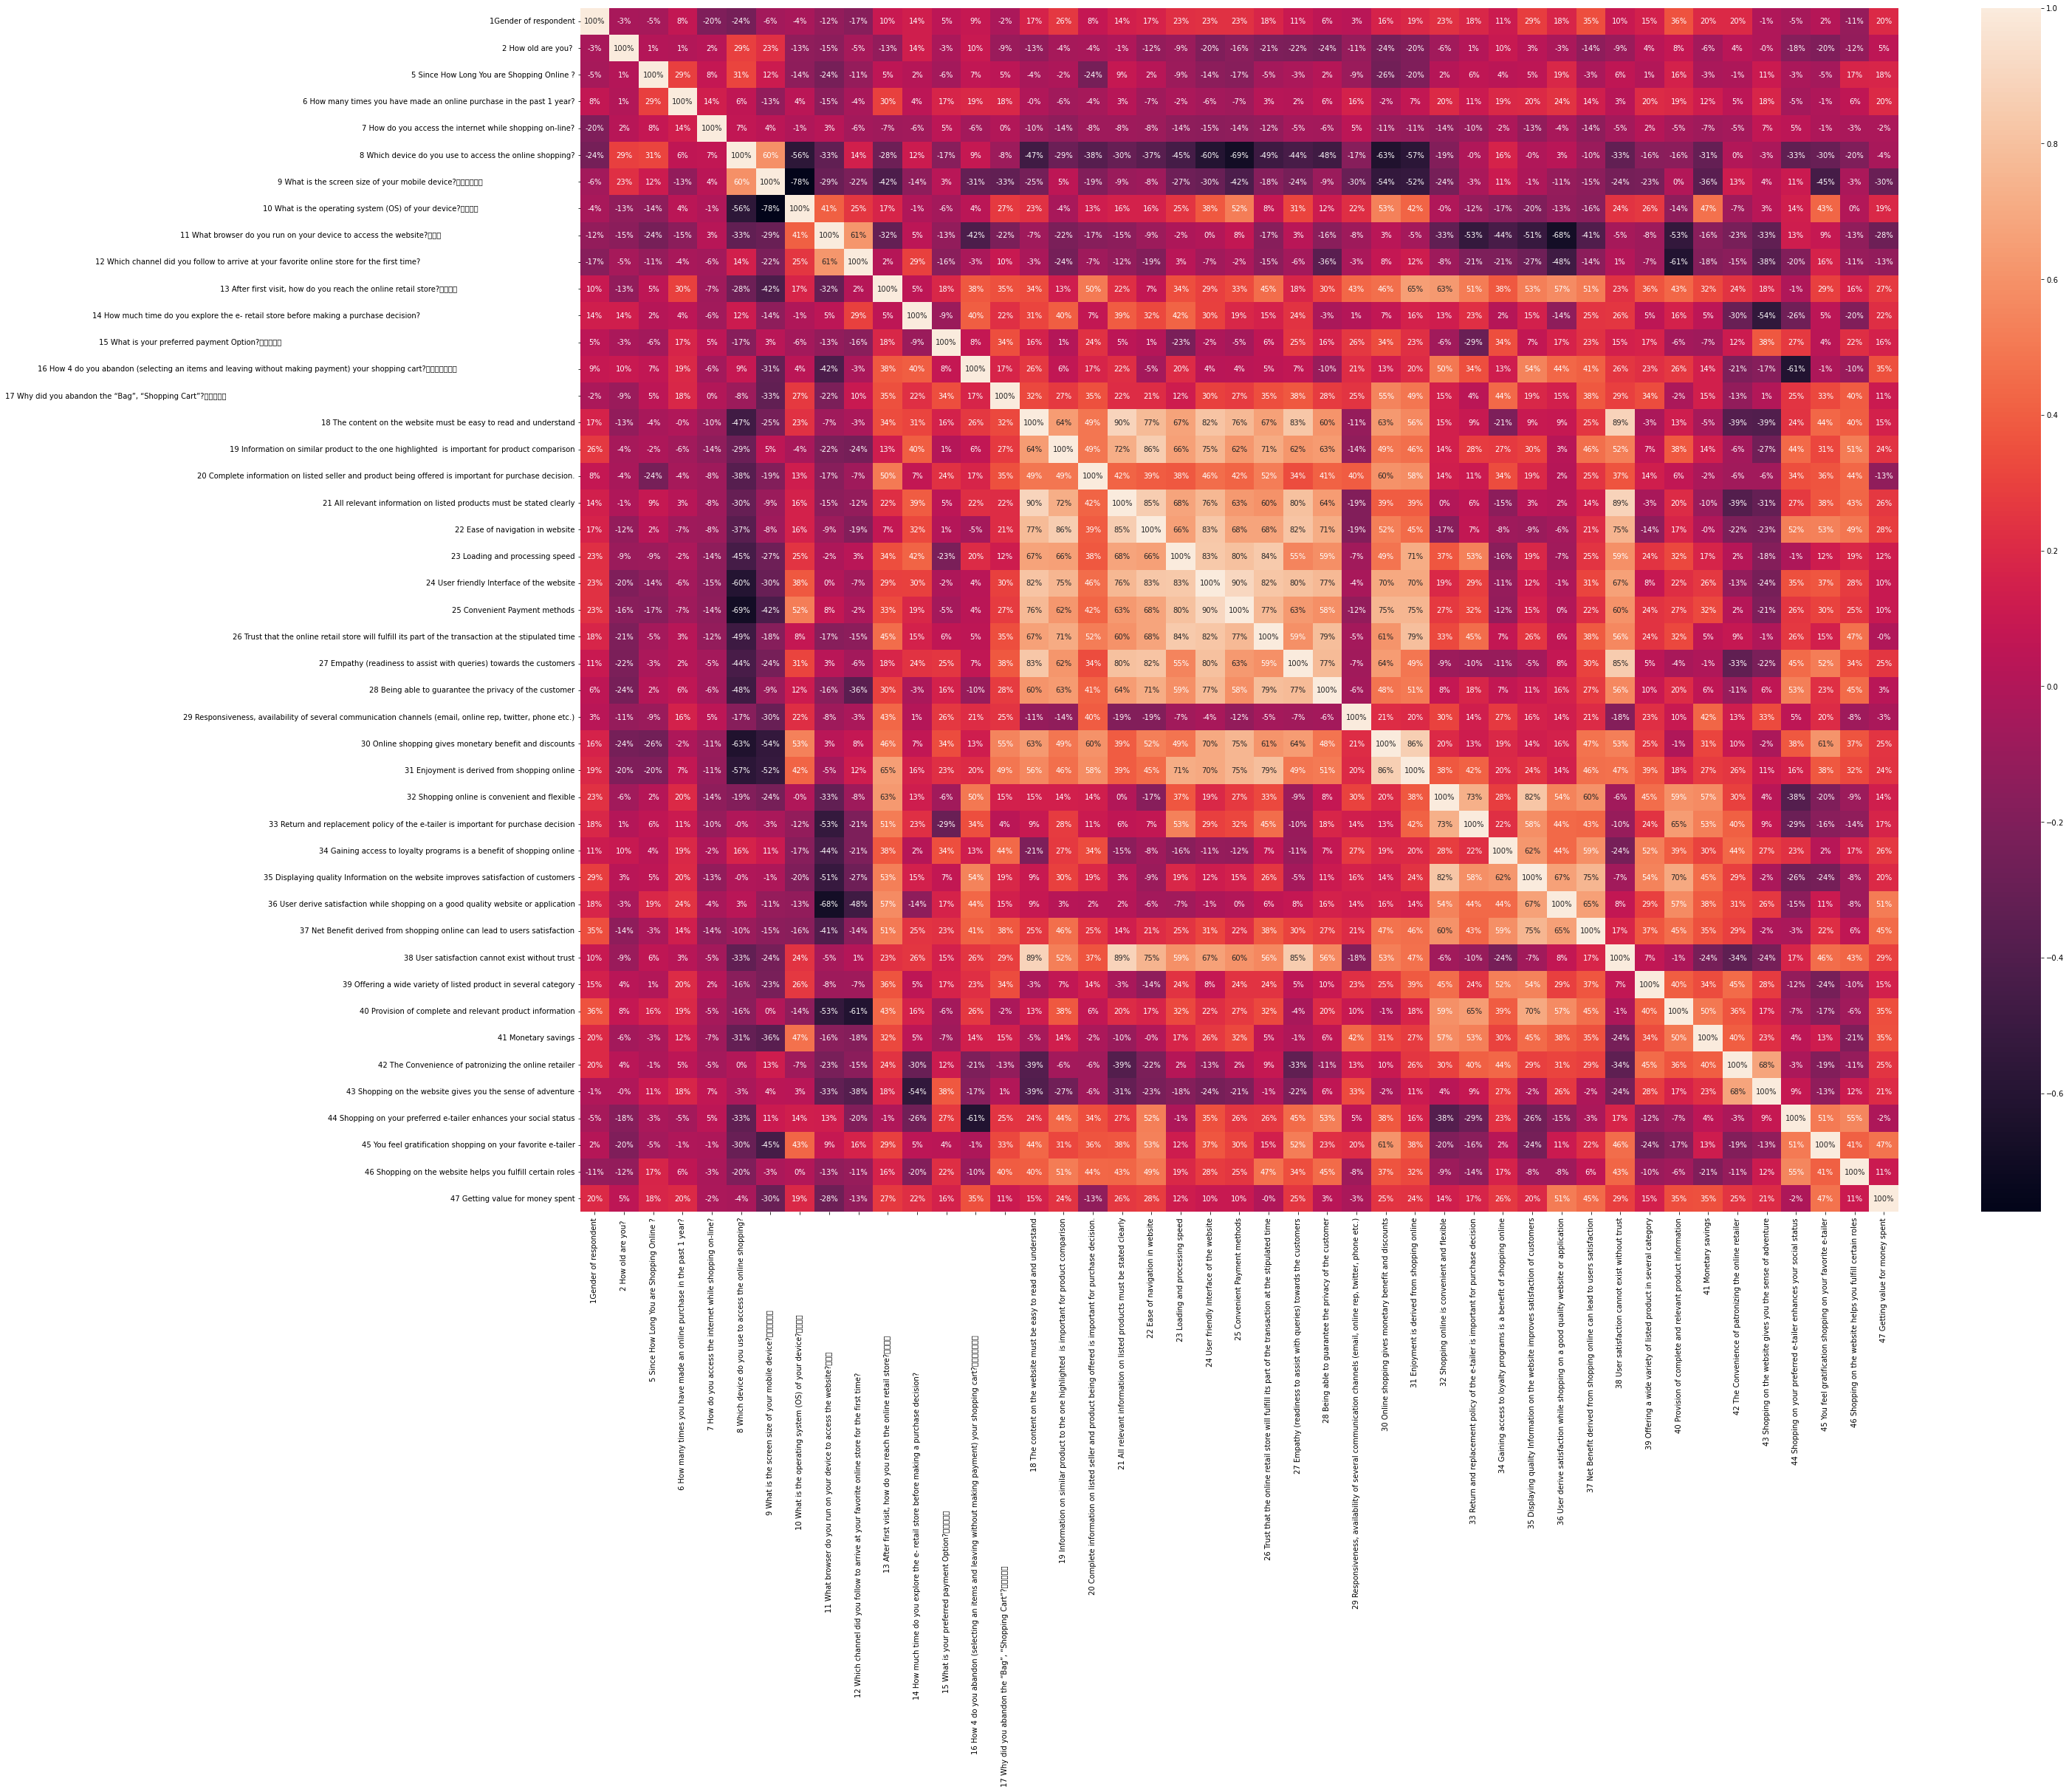

<Figure size 432x288 with 0 Axes>

In [145]:
# Correlation matrix
plt.figure(figsize=(40,30))
sns.heatmap(df.corr(), annot= True, fmt='.0%')
plt.show()
plt.savefig("corr-matrix")

From here we can observe that our data is highly correlated with one anaother, we need to reduce some features to remove this multicolinearity. we will check it later.

<AxesSubplot:xlabel='1Gender of respondent', ylabel='6 How many times you have made an online purchase in the past 1 year?'>

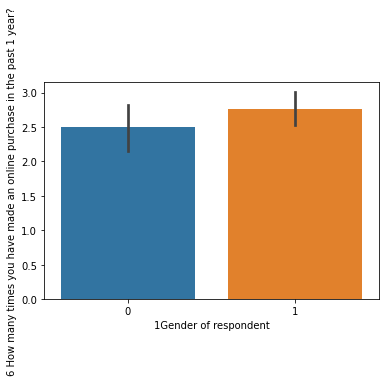

In [91]:
sns.barplot('1Gender of respondent', 
            '6 How many times you have made an online purchase in the past 1 year?', data=df)

We can observe that Female did more shopping than male in past 1 year. here 0 represents male and 1 represents female.

<AxesSubplot:xlabel='2 How old are you? ', ylabel='6 How many times you have made an online purchase in the past 1 year?'>

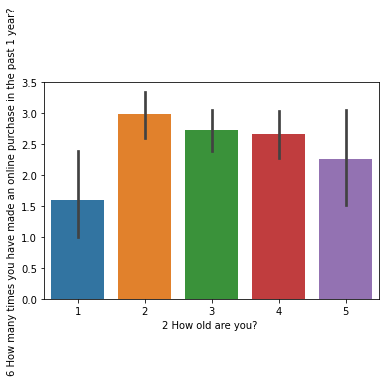

In [96]:
sns.barplot('2 How old are you? ',
           '6 How many times you have made an online purchase in the past 1 year?', data=df)

we can observe that 21-30 age group people do alot of online shopping while least online shopping is done by people less than 20.

<AxesSubplot:xlabel='16 How 4 do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t                                                   ', ylabel='17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t                                                                                                                                                       '>

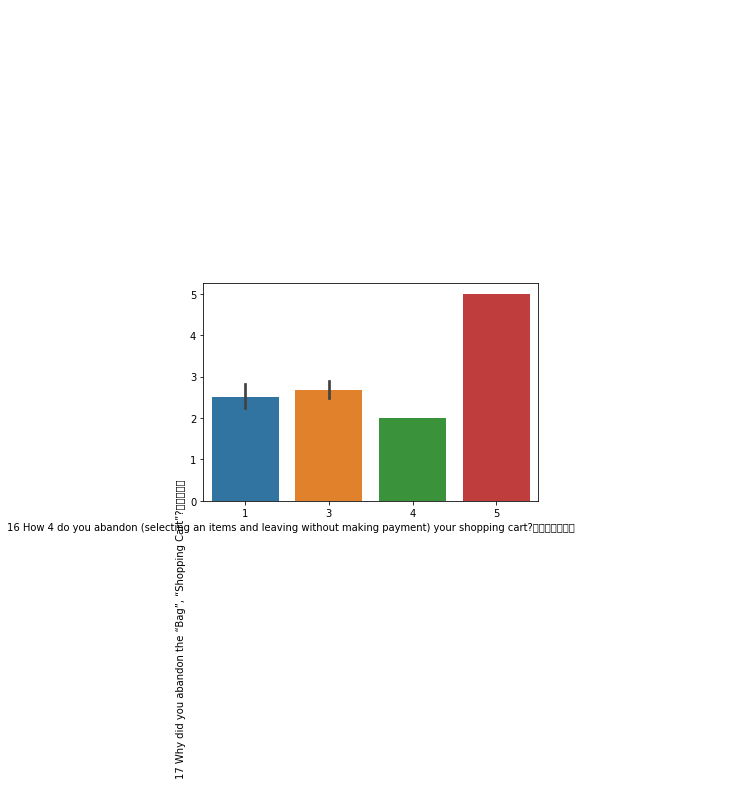

In [98]:
sns.barplot('16 How 4 do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t                                                   ',
       '17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t                                                                                                                                                       ',data=df)

From here we can observe that people very frequently abandon carts because there promo code is not applicable.
And the lowest value belongs to frequently and the reason is better alternative offer.

<AxesSubplot:xlabel='10 What is the operating system (OS) of your device?\t\t\t\t                                          ', ylabel='11 What browser do you run on your device to access the website?\t\t\t                                                          '>

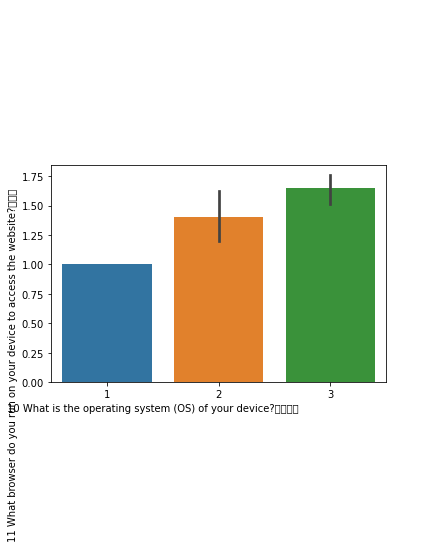

In [99]:
sns.barplot('10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',data=df)

Most of the customer are using IOS/Mac as there operating system followed by android and then windows, and the browser used by them are mostly safari or google chrome.

<Figure size 864x504 with 0 Axes>

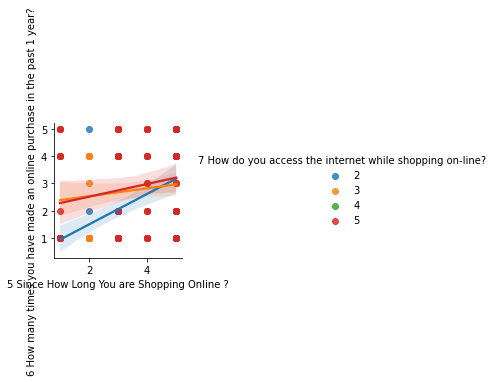

In [151]:
plt.figure(figsize=(12,7))
sns.pairplot(x_vars='5 Since How Long You are Shopping Online ?',
       y_vars='6 How many times you have made an online purchase in the past 1 year?',
       hue='7 How do you access the internet while shopping on-line?', data=df, kind='reg')
plt.show()

we can see that last year purchase is independent of how long have some one being shopping. Also customer normally use mobile internet or wifi for online shopping.

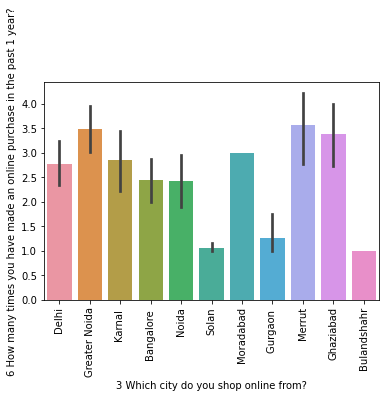

In [148]:
sns.barplot('3 Which city do you shop online from?', 
             '6 How many times you have made an online purchase in the past 1 year?', data=df)
plt.xticks(rotation=90)
plt.show()

We can observe that over past 1 year more number of are made from Greater Nodia, followed by Meerut and Gaziabad. Its interesting to observe that sub part(cities touching Delhi) of Delhi are more in online shopping than Delhi itself.

In [109]:
info=df.groupby(['18 The content on the website must be easy to read and understand',
       '19 Information on similar product to the one highlighted  is important for product comparison',
       '20 Complete information on listed seller and product being offered is important for purchase decision.',
       '21 All relevant information on listed products must be stated clearly',
       '22 Ease of navigation in website', '23 Loading and processing speed',
       '24 User friendly Interface of the website']).size().reset_index()
info.head()

18 The content on the website must be easy to read and understand  \
0                                                  1                   
1                                                  3                   
2                                                  4                   
3                                                  4                   
4                                                  4                   

   19 Information on similar product to the one highlighted  is important for product comparison  \
0                                                  2                                               
1                                                  4                                               
2                                                  3                                               
3                                                  3                                               
4                                                  4                                               

   20 Complete information on listed seller and product being offered is important for purchase decision.  \
0                                                  2                                                        
1                                                  5                                                        
2                                                  3                                                        
3                                                  4                                                        
4                                                  3                                                        

   21 All relevant information on listed products must be stated clearly  \
0                                                  1                       
1                                                  2                       
2                                                  4                       
3                                                  2                       
4                                                  4                       

   22 Ease of navigation in website  23 Loading and processing speed  \
0                                 1                                2   
1                                 4                                3   
2                                 4                                1   
3                                 2                                3   
4                                 5                                4   

   24 User friendly Interface of the website   0  
0                                          1  18  
1                                          4   7  
2                                          2  12  
3                                          3   5  
4                                          5  25

We are using groupby function to group all the columns talk about information provided on the website or application

Text(0.5, 1.0, 'Information')

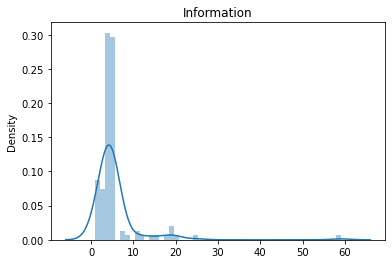

In [175]:
sns.distplot(info)
plt.title("Information")

We can observe the bell shape curve with respect to how customer invest in the site with good and clear information. If proper information is given about product seller other details then customer is willing to make a purchase decision. And most of the customer strongly agrees with that.

Text(0.5, 1.0, 'Convinence')

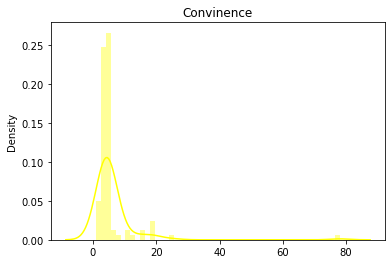

In [176]:
convinence=df.groupby(['24 User friendly Interface of the website',
       '25 Convenient Payment methods',
       '26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time',
       '27 Empathy (readiness to assist with queries) towards the customers',
       '28 Being able to guarantee the privacy of the customer',
       '29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)',]).size().reset_index()

sns.distplot(convinence,color='yellow')
plt.title("Convinence")

Here as well we can observe that customer strongly agreed that the website or app for online shopping must be convinent to operate, must poses user friendly interface, easy payment options,customer service etc.

Text(0.5, 1.0, 'Monetary Benefits')

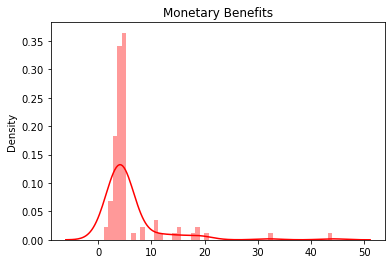

In [177]:
monetary= df.groupby(['30 Online shopping gives monetary benefit and discounts','34 Gaining access to loyalty programs is a benefit of shopping online',
'37 Net Benefit derived from shopping online can lead to users satisfaction','41 Monetary savings','47 Getting value for money spent',]).size().reset_index()

sns.distplot(monetary,color='red')
plt.title("Monetary Benefits")

Monetary benefits is one of the primary reason customers go for online shopping, it gives them freedom to choose from wide variety, can compare similar products as well as . Discount and promo codes are plus which attract good amount customer traffic to the website.

Text(0.5, 1.0, 'Hedonic Values')

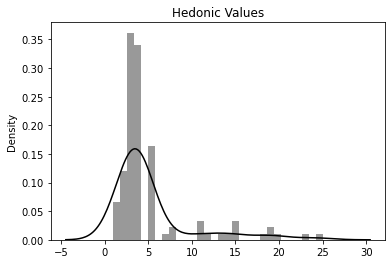

In [119]:
hedonic=df.groupby(['42 The Convenience of patronizing the online retailer',
       '43 Shopping on the website gives you the sense of adventure',
       '44 Shopping on your preferred e-tailer enhances your social status',
       '45 You feel gratification shopping on your favorite e-tailer',
       '46 Shopping on the website helps you fulfill certain roles',]).size().reset_index()

sns.distplot(hedonic, color='black')
plt.title("Hedonic Values")

Hedonic values basically include adventure, social status, gratification, roles kind of thing, It plays an important role, but the values for them basically lies between indifferent to agree and few strongly agree.

# Conclusion:

Customer retention is highly correlated with customer satisfaction , a happy customer will retain with the app or website for future purchases. For that we can divide the factors into major two categories Utilitarian and Hedonic values.


Under Utitlitarian values we include product information, product offerings, monetary benefits, and convinence. These are the major factors which can affect customer decision to make purchase, while Hedonic values basically related to outerself, ideaism related to sense of adventure, role fulfillment, social status, gratification and list goes on. These are basically things we did for sake of others.


We also see that females are move likely to do online shopping than male, also young people in age range of 21-30 are likely to do more online shopping than others.

In short we can say that out data definitely provide us some insight about the customer retention on online platforms, and in second part of data we also observe that out of all websites mentioned, Amazon.in followed by Flipkart full fill most of the tickmarks with flying colors. customer trust on these platforms with there information, security of data and overall customer service/convinence offered by them.